#### 훈련 세트와 테스트 세트 만들기 #1

- 도미와 빙어 데이터를 2차원 리스트로 변경</br>
    • 총 49마리의 데이터: 도미 35마리, 빙어 14마리</br>
    • zip() 함수 사용

In [3]:
# 데이터 생성
# • 길이와 무게를 합친 2차원 리스트 생성: fish_data
# • 결과 확인을 위한 리스트 생성: fish_target

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 
38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 
11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 
475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 
575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 
920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 
8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] # 2차원 리스트[길이, 무게]
fish_target = [1] * 35 + [0]*14 # target 값 생성

#### 훈련 세트와 테스트 세트 만들기 #2

• fish_data, fish_target 리스트를 훈련 세트와 테스트 세트로 분리</br>
    - 훈련 세트: 35개, 테스트 세트: 14개로 분리

In [6]:
#	훈련 세트 생성(35개)
train_input =	fish_data[:35]	# 0 ~ 34
train_target =	fish_target[:35]

#	테스트 세트 생성(14개)
test_input =	fish_data[35:] # 35 ~ 끝까지
test_target =	fish_target[35:]

#### 테스트 세트로 평가하기
- k-최근접 알고리즘 모델 생성 및 평가하기</br>
    • 훈련 세트로 모델을 훈련</br>
    • 테스트 세트로 정확도 평가

In [7]:
from cgi import test
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 객체 생성
kn = kn.fit(train_input, train_target) # 모델 훈련
kn.score(test_input, test_target) # 테스트 세트로 평가(정확도 출력)

# • 잘못된 훈련 데이터 사용 결과 => 정확도 0.0
#  도미 데이터로만 훈련했기 때문에(샘플링 편향)

0.0

### Numpy를 활용한 배열 생성
- Numpy 사용</br>
    - 다차원 배열을 쉽게 조작할 수 있음

In [8]:
# 기존 fish_data와 fish_target를 Numpy 배열로 변경
# • Numpy.array(list):	파이썬의 list를 Numpy의 array로 변경
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape) #	shape:	배열의 크기 리턴

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


### Numpy를 이용하여 데이터 섞기
- Numpy 사용</br>
    • random.seed(seed) : 랜덤값 생성을 위한 초기값 지정
    - 초기값(seed)값이 같으면 동일한 랜덤값을 뽑을 수 있음</br>

    • Numpy.arange(stop):	stop-1까지 1의 간격으로 배열 생성</br> 
    - arange: array range</br>
        
    • random.shuffle(x):	배열 x(ndarray 타입)를 무작위로 섞음

In [9]:
import numpy as np
np.random.seed(42)
index_list = np.arange(49) # 0~48까지 값을 가지는 배열 생성
print(index_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [10]:
np.random.shuffle(index_list) # 배열 내용을 무작위로 섞음
print(index_list)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


#### 랜덤 배열로 훈련 세트와 테스트 세트 만들기
- Numpy의 배열 인덱싱 이용</br>
    • 여러 개의 인덱스로 한 번에 여러 개의 배열 원소를 선택할 수 있음

In [12]:
#	훈련 세트 생성
train_input =	input_arr[index_list[:35]] # 랜덤하게 섞인 배열을 인덱스로 사용
train_target =	target_arr[index_list[:35]]

#	테스트 세트 생성
test_input =	input_arr[index_list[35:]]
test_target =	target_arr[index_list[35:]]
# 총 4개의 배열 생성

### 무작위로 섞인 데이터 확인하기

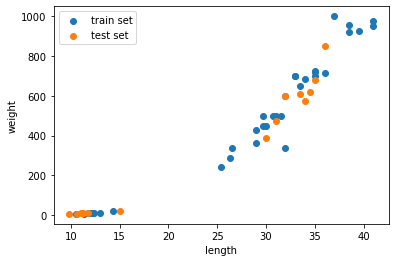

In [13]:
# 훈련 데이터와 테스트 데이터 다시 확인
from cProfile import label
import matplotlib.pyplot as plt
#	[:,	0]:	모든 행에서 0번째 length,	[:,	1]:	모든 행에서 1번째 weight
plt.scatter(train_input[:, 0], train_input[:, 1], label = "train set")
plt.scatter(test_input[:, 0], test_input[:, 1], label = "test set")

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()